# Week 1 Discussion - Simulate Monty Hall Problem

The purpose of this notebook is to simulate the infamous, Monty Hall (game show host) problem. A description of the gameshow is as follows: 

<i>"Monty Hall asks you to choose one of three doors. One of the doors hides a prize and the other two doors have no prize. You state out loud which door you pick, but you don’t open it right away. Monty opens one of the other two doors, and there is no prize behind it. At this moment, there are two closed doors, one of which you picked. The prize is behind one of the closed doors, but you don’t know which one. Monty asks you, “Do you want to switch doors?”</i>

The question is whether or not it is in your best interest to switch doors. Most people assume yes, but think its because your probability of winning raises from 33% (the probability of winning without switching) to 50%. In actuality, switching actually doubles your chances of winning all the way to 66%! The simulation below will show this computationally: 

In [1]:
# import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# run simulation using both methodologies (switching vs. not switching) for 10,000 games each.
# store results in two separate lists.

method1_results = []
method2_results = []

for i in range(1, 10000):
    win_door = random.randint(1, 3)
    choice1_door = random.randint(1, 3)
    
    # method 1 - sticking with your choice
    if win_door == choice1_door:
        method1_results.append(1)
    else:
        method1_results.append(0)
    
    # method 2 - switching doors
    choice2_door = [1, 2, 3].remove(choice1_door)
    if choice1_door == win_door:
        method2_results.append(0)
    else:
        method2_results.append(1)

In [3]:
# convert results into dataframe 

results_df = pd.DataFrame(zip(method1_results, method2_results),
                          columns=['method1', 'method2'])
results_df.head()

,method1,method2
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [4]:
# aggregate results

agg_df = pd.melt(results_df, value_vars=['method1', 'method2'], var_name='method', value_name='result')
agg_df['totals'] = agg_df['result']
agg_df = agg_df.groupby(['method', 'result']).count().reset_index()
agg_df

,method,result,totals
0,method1,0,6770
1,method1,1,3229
2,method2,0,3229
3,method2,1,6770


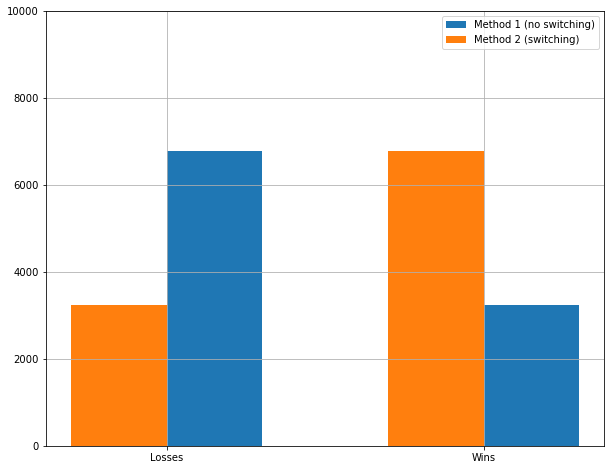

In [5]:
plt.figure(figsize=(10,8))
plt.bar(agg_df[agg_df['method']=='method1']['result']+0.15, 
        agg_df[agg_df['method']=='method1']['totals'], 
        label='Method 1 (no switching)', width=0.3)
plt.bar(agg_df[agg_df['method']=='method2']['result']-0.15, 
        agg_df[agg_df['method']=='method2']['totals'], 
        label='Method 2 (switching)', width=0.3)
plt.xticks([0,1], ['Losses', 'Wins'])
plt.ylim(0, 10000)
plt.legend()
plt.grid()
plt.show()

We see indeed from the table and barchart above that switching doors is in the contestant's best interest, and that this methodology resulted in a contestant winning about twice as often (3,306 wins for method 1, and 6,693 wins for method 2). 

The reason for this is that so long as your pick a losing door as your first choice, switching your door will always result in winning (since Monty shows you the other door that doesn't have a prize). Since your chance of winning a losting door during your first choice is 2/3, you chance of winning from switching is also 2/3. The empirical results align with this logic.